<a href="https://colab.research.google.com/github/vedaanth-arch/Customer-Satisfaction-Analysis-/blob/main/Customer_Satisfaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Data set](https://statso.io/2024/07/29/customer-satisfaction-case-study/)

# **Importing libraries required**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Data Loading & Summary**

In [3]:
df=pd.read_excel('/content/E-commerce_NPA_Dataset.xlsx')
print(df.head())

   CustomerID  Age  Gender  PurchaseAmount  PurchaseFrequency  \
0           1   38  Female      749.097626                 24   
1           2   30    Male      735.224916                 18   
2           3   55    Male     1145.520305                 22   
3           4   39  Female      925.460535                 14   
4           5   51    Male      108.359916                  9   

   ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
0                     2                   1                      3   
1                     5                   4                      4   
2                     3                   5                      4   
3                     4                   3                      2   
4                     3                   3                      2   

   WebsiteEaseOfUseRating  ReturnRate  DiscountUsage LoyaltyProgramMember  \
0                       5        0.12     135.392573                   No   
1                       5        0

## Description of data

In [4]:
print(df.describe())

       CustomerID         Age  PurchaseAmount  PurchaseFrequency  \
count  500.000000  500.000000      500.000000         500.000000   
mean   250.500000   44.170000     1065.050731          14.308000   
std    144.481833   14.813777      583.199658           8.151197   
min      1.000000   18.000000       51.799790           1.000000   
25%    125.750000   32.000000      535.083407           7.000000   
50%    250.500000   44.000000     1100.884065          14.000000   
75%    375.250000   58.000000     1584.348124          22.000000   
max    500.000000   69.000000     1999.655968          29.000000   

       ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
count             500.00000          500.000000               500.0000   
mean                2.93400            3.008000                 3.0780   
std                 1.41054            1.372481                 1.4156   
min                 1.00000            1.000000                 1.0000   
25%              

##**Checking missing Values**

In [12]:
print("This checks the Missing values:")
print(df.isnull().sum(),end=" ")

This checks the Missing values:
CustomerID                0
Age                       0
Gender                    0
PurchaseAmount            0
PurchaseFrequency         0
ProductQualityRating      0
DeliveryTimeRating        0
CustomerServiceRating     0
WebsiteEaseOfUseRating    0
ReturnRate                0
DiscountUsage             0
LoyaltyProgramMember      0
Overall Rating            0
dtype: int64 

##**Data types of Data**

In [11]:
print("Data types of the data:")
print(df.info(),end=" ")

Data types of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              500 non-null    int64  
 1   Age                     500 non-null    int64  
 2   Gender                  500 non-null    object 
 3   PurchaseAmount          500 non-null    float64
 4   PurchaseFrequency       500 non-null    int64  
 5   ProductQualityRating    500 non-null    int64  
 6   DeliveryTimeRating      500 non-null    int64  
 7   CustomerServiceRating   500 non-null    int64  
 8   WebsiteEaseOfUseRating  500 non-null    int64  
 9   ReturnRate              500 non-null    float64
 10  DiscountUsage           500 non-null    float64
 11  LoyaltyProgramMember    500 non-null    int64  
 12  Overall Rating          500 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 50.9+ KB
None 

# **Loyalty Program Mapping**

In [7]:
# Convert LoyaltyProgramMember Yes/No to 1/0 for proper analysis
print("Converting Loyalty Program Member values from yes/no to 0/1 for proper analysis")
df['LoyaltyProgramMember'] = df['LoyaltyProgramMember'].map({'Yes':1,'No':0})
print(df['LoyaltyProgramMember'][0:4])


Converting Loyalty Program Member values from yes/no to 0/1 for proper analysis
0    0
1    1
2    1
3    1
Name: LoyaltyProgramMember, dtype: int64


This involves the calculation of Correlations:
**If you measure hours studied and exam scores,
more hours → higher scores (high positive correlation).
If you measure hours playing games vs exam scores, more gaming → lower scores (negative correlation).
If you compare shoe size vs exam scores, probably no connection → zero correlation**
By finding correlation between all factors, the factors which move together generally are highly correlated so it's majorly affected.



##**Understanding Satisfaction Drivers**: Identifying which aspects (product quality, delivery time, customer service, website usability) most significantly impact overall customer satisfaction.

In [34]:
# Which factors impact satisfaction most
print("Which product/service factors (like delivery, quality, service) impact satisfaction most")
print('\n')
factors = ['ProductQualityRating','DeliveryTimeRating','CustomerServiceRating','WebsiteEaseOfUseRating']
for f in factors:
    corr = df[[f,'Overall Rating']].corr().iloc[0,1]
    print(f"{f} correlation with OverallRating: {corr}")
    print('\n')

Which product/service factors (like delivery, quality, service) impact satisfaction most


ProductQualityRating correlation with OverallRating: 0.11034059629140387


DeliveryTimeRating correlation with OverallRating: -0.02327647282621963


CustomerServiceRating correlation with OverallRating: -0.03164649652051215


WebsiteEaseOfUseRating correlation with OverallRating: -0.06750902175886139




# Adding a Overall Rating column for better calculations





In [14]:
corr = df[[f,'Overall Rating']].corr().iloc[0,1]

### **Demographic and Behavioral Insights**: Analyzing how satisfaction varies across different demographic groups (age, gender) and purchasing behaviors (purchase amount, frequency, discount usage).

In [19]:
# Demographic analysis
print("This firstly gives the Gender-wise average satisfaction:")
print(df.groupby('Gender')['Overall Rating'].mean(),end=" ")
print("\n")
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,25,40,60,100], labels=['<25','25-40','40-60','60+'])
print(df.groupby('AgeGroup')['Overall Rating'].mean())
print("\n")
print(df.groupby('PurchaseFrequency')['Overall Rating'].mean())


This firstly gives the Gender-wise average satisfaction:
Gender
Female    5.224130
Male      5.221919
Name: Overall Rating, dtype: float64 

AgeGroup
<25      5.215681
25-40    5.239226
40-60    5.213895
60+      5.220080
Name: Overall Rating, dtype: float64


PurchaseFrequency
1     5.267910
2     5.177233
3     5.232232
4     5.139142
5     5.195230
6     5.274380
7     5.219907
8     5.204244
9     5.196015
10    5.196263
11    5.137284
12    5.191385
13    5.223669
14    5.227104
15    5.251641
16    5.232064
17    5.231351
18    5.185814
19    5.222378
20    5.205850
21    5.236922
22    5.272069
23    5.254587
24    5.249704
25    5.254020
26    5.246488
27    5.261108
28    5.245211
29    5.251206
Name: Overall Rating, dtype: float64


# **Loyalty Program Effectiveness**: Evaluating the impact of loyalty program membership on customer satisfaction and retention.

In [21]:
# Loyalty Program Effectiveness
print("Businesses want to know if their loyalty program is working — i.e., making customers happier and more likely to keep buying.")
print(df.groupby('LoyaltyProgramMember')['Overall Rating'].mean())

Businesses want to know if their loyalty program is working — i.e., making customers happier and more likely to keep buying.
LoyaltyProgramMember
0    5.228789
1    5.217882
Name: Overall Rating, dtype: float64


# **Root Cause Analysis**: Identifying the root causes of dissatisfaction to provide actionable recommendations for enhancing customer experience.

In [37]:
# Root Cause Analysis
print("Find out why customers are dissatisfied — which factors (product quality, delivery, service, etc.) are low when overall satisfaction is low.")
low_sat = df[df['Overall Rating'] < 3]

if not low_sat.empty:
    print(low_sat[factors].mean(), end=" ")
else:
    print("No customers found with Overall Rating < 3.")

print('\n')
print("Low factor averages → common issues → need to improve those aspects to boost satisfaction.")


Find out why customers are dissatisfied — which factors (product quality, delivery, service, etc.) are low when overall satisfaction is low.
No customers found with Overall Rating < 3.


Low factor averages → common issues → need to improve those aspects to boost satisfaction.


# **Net Promoter Score (NPS)**: Calculating the NPS to gauge overall customer loyalty and identify areas to convert detractors into promoters.

In [33]:
# NPS Calculation
print("NPS-measures customer loyalty")
df['NPS_Group'] = df['Overall Rating'].apply(lambda x: 'Promoter' if x >= 4 else ('Passive' if x == 3 else 'Detractor'))
counts = df['NPS_Group'].value_counts(normalize=True)
nps = (counts.get('Promoter', 0) - counts.get('Detractor', 0)) * 100
print('NPS:', nps)
p=df.columns.tolist()
for i in p:
  print(i,end="\n")


NPS-measures customer loyalty
NPS: 100.0
CustomerID
Age
Gender
PurchaseAmount
PurchaseFrequency
ProductQualityRating
DeliveryTimeRating
CustomerServiceRating
WebsiteEaseOfUseRating
ReturnRate
DiscountUsage
LoyaltyProgramMember
Overall Rating
AgeGroup
NPS_Group


# **Demographic Visualizations**

### **Bar Plot for  Gender-wise Average Satisfaction**

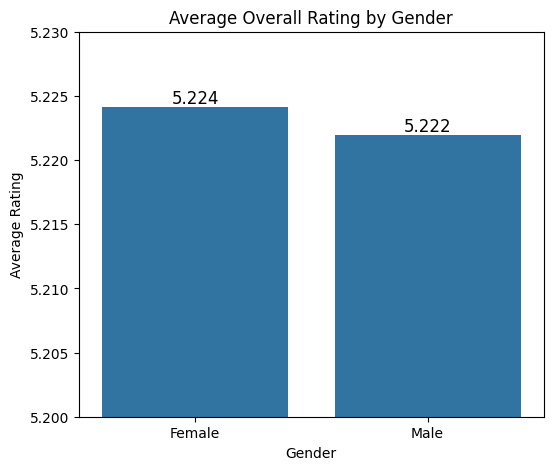

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
ax = sns.barplot(x='Gender', y='Overall Rating', data=df, ci=None)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.title("Average Overall Rating by Gender")
plt.ylim(5.2, 5.23)  # Zoom in to show differences clearly
plt.ylabel("Average Rating")
plt.show()


###**Histogram for  Age Distribution**

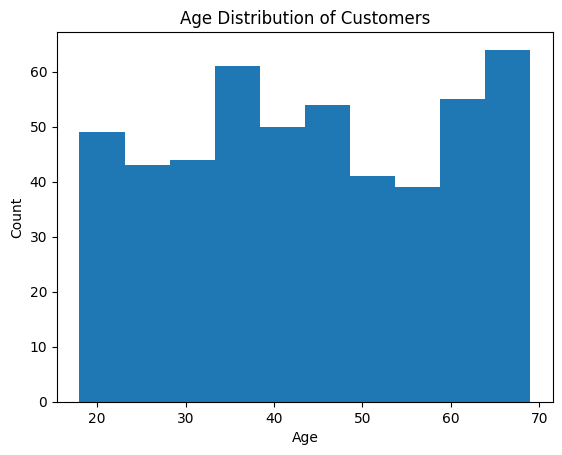

In [41]:
plt.hist(df['Age'], bins=10)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#**Product/Service Quality Impact**

###**Scatter Plot for Product Quality vs Overall Rating**

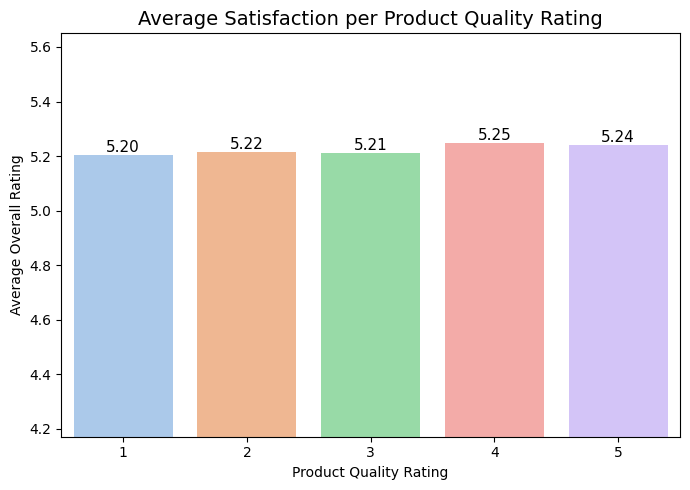

In [53]:

plt.figure(figsize=(7, 5))
ax = sns.barplot(
    x='ProductQualityRating',
    y='Overall Rating',
    data=df,
    estimator=np.mean,
    ci=None,
    palette='pastel'
)

# Add data labels (average values) on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',               # format to 2 decimal places
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11)

plt.title("Average Satisfaction per Product Quality Rating", fontsize=14)
plt.xlabel("Product Quality Rating")
plt.ylabel("Average Overall Rating")
plt.ylim(df['Overall Rating'].min(), df['Overall Rating'].max() + 0.05)  # Add a bit of headroom
plt.tight_layout()
plt.show()

#**Loyalty and Purchase Behavior**

###**Bar Plot for Loyalty Program vs Satisfaction**

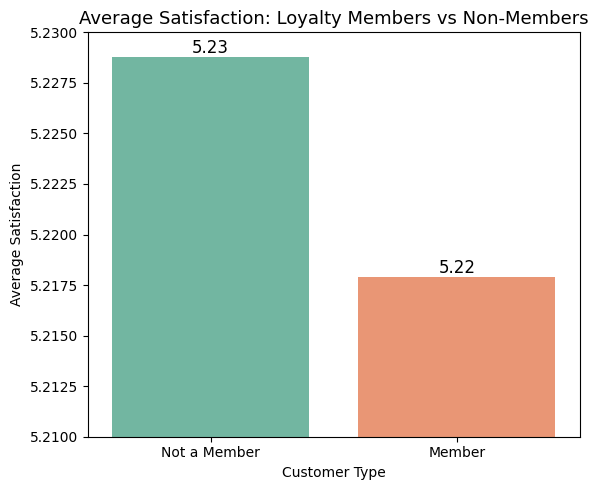

In [55]:
# Convert 0/1 to labels for better readability
df['LoyaltyStatus'] = df['LoyaltyProgramMember'].map({0: 'Not a Member', 1: 'Member'})
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='LoyaltyStatus', y='Overall Rating', data=df, ci=None, palette='Set2')

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

plt.title("Average Satisfaction: Loyalty Members vs Non-Members", fontsize=13)
plt.xlabel("Customer Type")
plt.ylabel("Average Satisfaction")
plt.ylim(5.21, 5.23)  # Zoom to see small difference
plt.tight_layout()
plt.show()

###**Line Plot for Purchase Frequency vs Overall Rating**

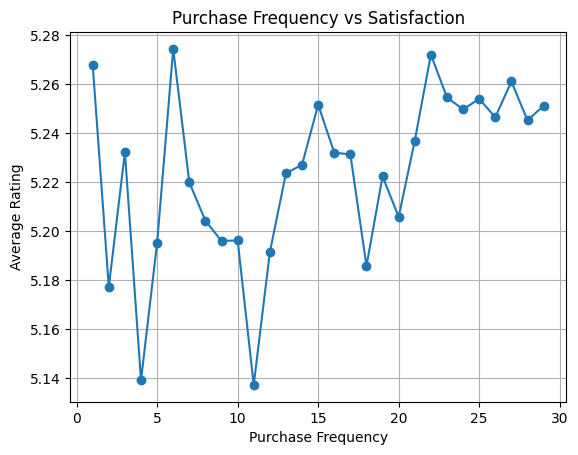

In [45]:
df.groupby('PurchaseFrequency')['Overall Rating'].mean().plot(kind='line', marker='o')
plt.title("Purchase Frequency vs Satisfaction")
plt.xlabel("Purchase Frequency")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


#**NPS (Net Promoter Score) Breakdown**

###**Pie Chart for NPS Group Distribution**

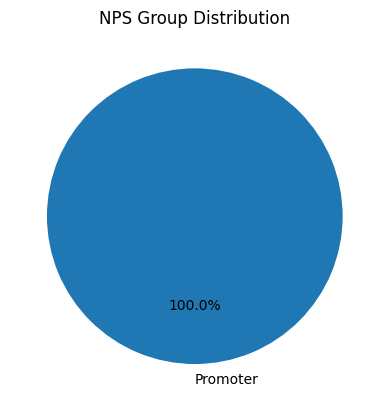

In [46]:
df['NPS_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("NPS Group Distribution")
plt.ylabel("")
plt.show()


###**Bar Plot for Count of Promoters, Passives, Detractors**

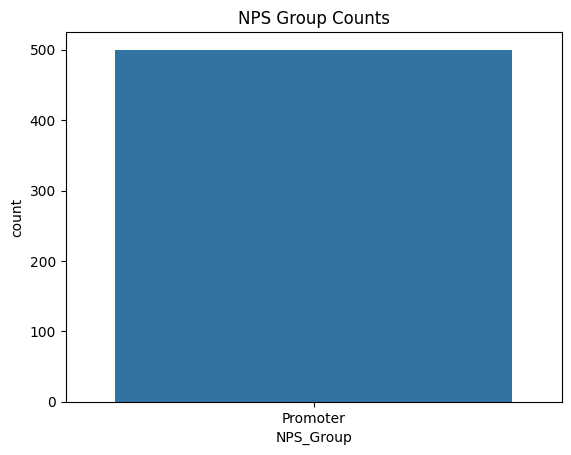

In [57]:
sns.countplot(x='NPS_Group', data=df)
plt.title("NPS Group Counts")
plt.show()

#**Discount & Return Rate Insights**

###**Scatter Plot for Discount Usage vs Satisfaction**

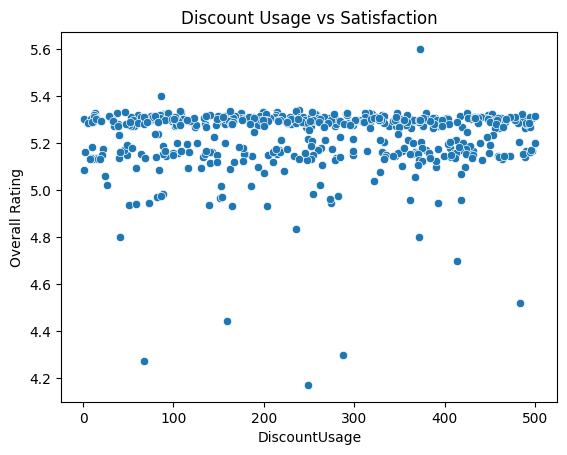

In [48]:
sns.scatterplot(x='DiscountUsage', y='Overall Rating', data=df)
plt.title("Discount Usage vs Satisfaction")
plt.show()


###**Scatter Plot for Return Rate vs Satisfaction**

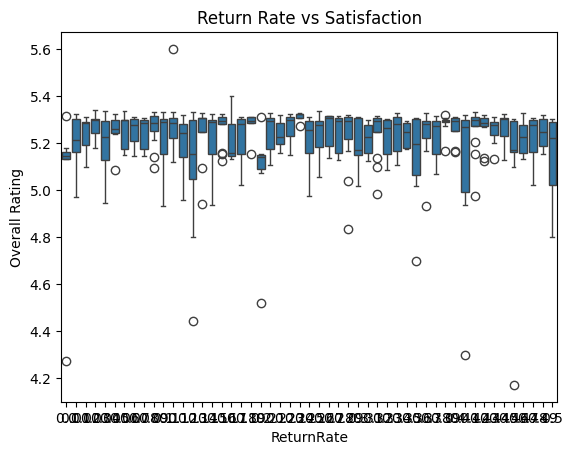

In [64]:
sns.boxplot(x='ReturnRate', y='Overall Rating', data=df)
plt.title("Return Rate vs Satisfaction")
plt.show()
